# Taylor Series and Floating-Point Error by Arslan Memon


## Part A: Approximation of a Function by Taylor Polynomials

In the first part of the project, we were to evaluate f(x)=cos(x) between [-3,3] using  a 4th, 8th, and 12th degree Taylor polynomial centered at 0. In order to evaluate the polynomial, we were required  to use a nested loop that took in a matrix of coefficients and the x value being evaluated

I started this project by going to the textbook and finding the psuedo-code for the nested algorithm and wrote the code in C++:
       
    double nest(Matrix &a, double x)
    {
        int n=a.Cols();// sets n to the number of columns there are in matrix a
        double p=a(n-1);//last coefficient is assigned to p
        for (int i=n-2;i>=0;i--)//LOOP multiply p by x and add the previous coefficient
        {
        
            p*=x;
            p+=a(i);
        }
        return p;
    }
This algorithm works inside out in the sense that it starts with the very last coefficients, n-1 in this case because the index of the matrix starts at 0,so the last element is n-1.  Then the coefficient is  multiplied by x and then the result is added to the coefficient n-2 and the process repeats until the first coefficient. 

In order to use the nested loop, I created a matrix using linspace and created 601 evenly divisible points from [-3,3].(-3,-2.99,-2.98,... , 3) Then I created a for loop that calculates the coefficients of the Taylor Polynomial up to the 12th degree. Afterward I stored the results of the points evaluated with a 4th, 8th, and 12th degree polynomial into three seperate matrices.

The following code creates the graph of the polynomials and cos(x):

Populating the interactive namespace from numpy and matplotlib


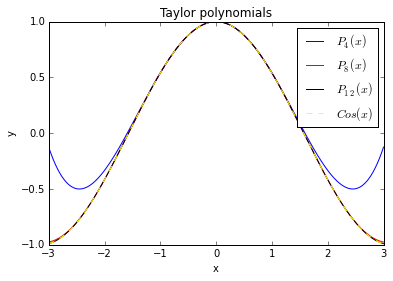

In [1]:
%pylab inline
z  = loadtxt('z.txt')
P4=loadtxt('p4.txt');
P8=loadtxt('p8.txt');
P12=loadtxt('p12.txt')
cos=loadtxt('f.txt')
plot(z, P4, 'b-',  label='$P_4(x)$')
plot(z, P8, 'r-', label='$P_8(x)$')
plot(z, P12, 'k-',  label='${P_1}_2(x)$')
plot(z, cos, 'yellow', linestyle='dashed',label='$Cos(x)$')
xlabel('x')
ylabel('y')
title('Taylor polynomials')
legend()

As can be seen by the graph, the Taylor polynomials provide a fairly accurate representation of f(x)=cos(x) around the center, x=0. Another interesting fact is that the more terms that a Taylor Polynomial has, the more accuate a representation of cos(x) is given in the range of values. It can clearly be seen by the graph that $P_4(x)$ is accurate around the center, but then strays as the domain grows farther from the center. By adding four terms, $P_8(x)$ looks like an accurate representation of cos(x) in [-3,3] but a tiny error becomes visible around the ends of the graph. ${P_1}_2(x)$, based on the graph above, seems to show perfect accuracy of cos(x) between [-3,3], however there is some error in it as well, just not visible in the graph above.

The following is code for the error graph using semilogy:

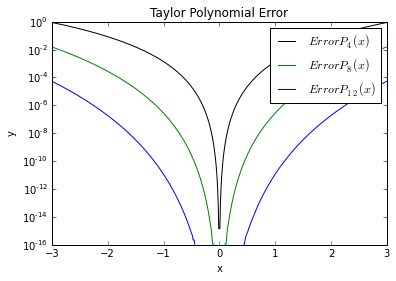

In [2]:
err4=loadtxt('err4.txt');
err8=loadtxt('err8.txt');
err12=loadtxt('err12.txt')
semilogy(z, err4, 'k-',  label='$Error P_4(x)$')
semilogy(z, err8, 'g-', label='$Error P_8(x)$')
semilogy(z, err12, 'b-',  label='$Error {P_1}_2(x)$')
legend()
xlabel('x')
ylabel('y')
title('Taylor Polynomial Error')
legend()

The error was calculated by subtracting the estimated value calculated by the taylor polynomials from the actual value calculated by cos(x). As can be seen by the graph, the relative error is lower around the center for all of the Taylor polynomials. Another interesting thing about the graph is that it clearly shows that the higher degree polynomials have exponentially less absolute error. Thus the answer to the question of which polynomial is a better approoximation for cos(-3) would be ${P_1}_2(-3)$. 

The following is an upper bound deriviation for each of the Taylor series approximation

|cosx-$p_4(x)$|<= E4=$f^5(z) (x-c)^5/5!$= |-sin(z) $x^5/120$= | <=|-$x^5$/120|<= |-($3^5$)/120|= 243/120=2.025

F(x)=cosx,  F’(x)=-sin(x), F’'(x)=-cos(x), F’’’(x)=sin(x), F’’’’(x)=cos(x), F’’’’’(x)=-sin(x)

Sinz is maxed at  z=pi/2 in [-3,3]

X ^5 is max at  x=3 in [-3,3]

$|cosx-p_8(x)|<= E8=f^9(z) (x-c)^9/9!= |-sin(z) x^9/362880|<=|-x^9/362880|<= |-(3^9)/362880 |= 19683/362880=.0542$

F^9(x)=-sinx

Sinz is maxed at  z=pi/2 in [-3,3]

$X ^9$ is max at  x=3 in [-3,3]

$|cosx-{p_1}_2(x)|<= E12=f^{13}(z) (x-c)^{13}/13!= |-sin(z) x^{13}/6227020800
|<=|-x^{13}/6227020800|<= |-(3^{13})/6227020800 |= 1594323/6227020800=.00025$

F^9(x)=-sinx

Sinz is maxed at  z=pi/2 in [-3,3]

$X ^{13}$ is max at  x=3 in [-3,3]

End of Calculations!!!

Based on these upperbound error calculations, it can be seen that the error decreases exponentially as more terms are added. The upperbound error for $P_4(x)$ is 2.025 on [-3,3], which is reasonable considering that  the highest absolute error in $P_4(x)$ is close to 1. The upperbound for $P_8(x)$, .0542, and $P_{12}(x)$, .00025, are respectively greater than the highes absolute errors of approximately $10^{-2}$ and $10^{-4}$.

## Part B:  Errors in a Forward Finite Difference Approximation

In part B, we were asked to evaluate the errors in a forward finite difference approximation of f'(3) where f(x)=$x^{-3}$ at x=3. First, I started by creating matrix n and used linspace to assign 52 evenly divisible values [1,52]. Then, I created a matrix called h and assigned values $2^{-n}$  to it using a for loop.

Afterward, I created to other matrices: r, which was assigned to the relative errors in a forward finite difference approximation, and R, the upper bound of the relative errors. r was calculated by calculating the forward difference, δ+f(a) = f(a + h) − f(a)/f(h), and then using it to calculate r= f'(a)-δ+f(a)/f'(a). I used a method with a parameter h to do this. R was calculated by calculatig c1, |f''(a)/2f'(a)|, and c2, |c2=f(a)edp/f'(a)|, where edp=$2^{-52}$ and pluging those into  $R=c1*h+c2*1/h$.

The following is code for the error graph vs n using semilogy:

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


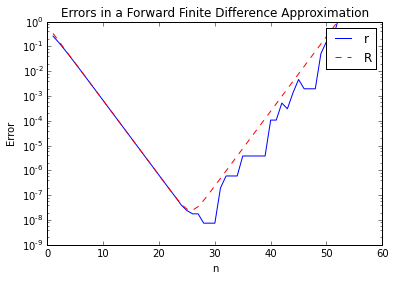

In [3]:
%pylab inline
r  = loadtxt('r.txt')
n  = loadtxt('n.txt')
h =loadtxt('h.txt')
R=loadtxt('Rcap.txt')

semilogy(n, r, 'b-',  label='r')
semilogy(n, R, 'r--',  label='R')
title('Errors in a Forward Finite Difference Approximation')
xlabel('n')
ylabel('Error')
legend()


The graph above shows that as n increases to around 26, r and R steadily decrease and are approximately the same. Afterward R starts increasing again, while r decreases a bit more until n= 30. Around n=30, r is at its lowest point indicating that the best approximation for f'(3)using the forward difference appproximation is around n=30 because the relative error is at its minimum point there. After n=30 r starts to increase jaggedly.

The following is code for the error graph vs n using loglog:

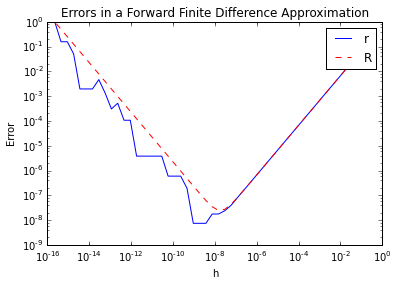

In [4]:
loglog(h, r, 'b-',  label='r')
loglog(h, R, 'r--',  label='R')
title('Errors in a Forward Finite Difference Approximation')
xlabel('h')
ylabel('Error')
legend()

The graph above shows that as h increases to around $10^{-7}$, R decreases steadily, while r decreases jaggedly. r, the relative error for f'(3), is at its min around h=$10^{-9}$, which is where the best approximation for f'(3)using the forward difference appproximation is. After h= $10^{-7}$ both r and R increase steadily.

The reason R decreases and increases can be seen by the formula $R=c1*h+c2/h$ since c1=.666667 is much larger than c2=0.00000000000000022204460492503131, until h=$10^{-9}$ c2/h overtakes c1*h because c2 is divided by such a small value that it becomes larger than c1 being multiplied by such a small value. As h gets bigger c1*h begines overtaking c2/h resulting in R increasing again. As for r, the formula for the forward difference shows why it decreases and increases,  δ+f(a) = f(a + h) − f(a)/f(h). As h increases $10^{-9}$, the forward difference gets smaller and smaller since a+h is approximately 3, thus the division by h makes the forward difference large, but at a decreasing rate. After h= $10^{-9}$, the numerator starts taking control, thus the difference starts increasing again.

CODE:
 
## Proj1_a.cpp
 
//  Created by Arslan Memon on 8/27/15.

//  Copyright (c) 2015 Arslan. All rights reserved.

//
//this belongs to Arslan Memon
    #include <iostream>
    #include "nest.cpp"
    #include <math.h>
    #include <tgmath.h>
    
    double factorial(double x)//calculates factorial
    {double fact=1;
      if(x==0)
          return 1;
       while (x!=0)
       {
           fact*=x;
           x--;
       }
        return fact;
    }
int main(int argc, const char * argv[]) {
 
    double coeff[13];//array of coefficients for taylor polynomial of cos(x)
    bool neg=false;//if coefficient is supposed  to be negative, then true
    for (int i=0.0; i<13; i++) {   //assigns coefficients to array
        if(i%2==0)
        {if(!neg)
        {
            coeff[i]=(double)(1.0/factorial(i));
            neg=true;
        }
            else
            {         coeff[i]=(double)(-1.0/factorial(i));
            neg=false;
            }
        }
        else{
            coeff[i]=0;
        }
        
    }
    
  
    Matrix z=Linspace(-3, 3, 601);//creates matrix with  601 evenly div numbers between -3 and 3
     Matrix p4coeff(1,5,coeff);//matrix with first 4 taylor coefficients
    
    Matrix p4(1,601);//matrix with result for 4th degree polynomial evaluated at z
    for (int i=0;i<601;i++)
    {
        p4(i)=nest(p4coeff,z(i));
    }
    p4.Write("p4.txt");//wriete results to text  file
    
    //same as above for 8th degree polynomial
    Matrix p8coeff(1,9,coeff);
    Matrix p8(1,601);
    for (int i=0;i<601;i++)
    {
        p8(i)=nest(p8coeff,z(i));
    }
    p8.Write("p8.txt");
    
    //same as above for 12th degree polynomial
    Matrix p12coeff(1,13,coeff);
    Matrix p12(1,601);
    for (int i=0;i<601;i++)
    {
        p12(i)=nest(p12coeff,z(i));
    }
    p12.Write("p12.txt");
    
    // all points are evaluated at cos(x)
    Matrix f(1,601);
    for (int i=0;i<601;i++)
    {
        f(i)=cos(z(i));
    }
    f.Write("f.txt");
    
    //calculate relative error for the three taylor polynomials
    Matrix err4(1,601);
    for (int i=0;i<601;i++)
    {
        err4(i)=cos(z(i))-p4(i);
    }
    err4.Abs();
    err4.Write("err4.txt");
    Matrix err8(1,601);
    for (int i=0;i<601;i++)
    {
        err8(i)=cos(z(i))-p8(i);
    }
    err8.Abs();
    err8.Write("err8.txt");
     Matrix err12(1,601);
    for (int i=0;i<601;i++)
    {
        err12(i)=cos(z(i))-p12(i);
    }
    err12.Abs();
    err12.Write("err12.txt");
    z.Write("z.txt");
    }


## Proj1_b.cpp


//  Created by Arslan Memon on 9/10/15.

//  Copyright (c) 2015 Arslan. All rights reserved.

    #include <iostream>
    using namespace std;
    #include "matrix.hpp"
    #include <math.h>
    #include <tgmath.h>

    double relativeError(double h)//calculate relative error using formula given
    {
        double sdpfa = (pow(3+h,-3)-pow(3,-3))/h;//δ+f(a) = f(a + h) − f(a)/f(h),a=3
        return ((-3*pow(3, -4))-sdpfa)/(-3*pow(3, -4));//r= f'(a)-δ+f(a)/f'(a), a=3
    }
    
    double upperBound(double h)//upper bound for error
    {
        double c1=fabs((12*pow(3,-5))/(-6*pow(3,-4)));//c1=|f''(a)/2f'(a)|
        double c2=fabs((pow(3, -3)*pow(2, -52))/(-3*pow(3,-4)));//|c2=f(a)edp/f'(a)
        return (c1*h)+(c2/h);

    }
int main(int argc, const char * argv[]) {

    Matrix n=Linspace(1, 52, 52);//evenly creates a matrix of 52 evenly divisible numbers
    Matrix h(52,1);
   
   //h=2^-n fill the matrix with for loop
    
    for (double i=0; i<n.Size(); i++) {
        h(i)= pow(2, -1*n(i));
    }
    Matrix r(52,1);//relative error matrix
    Matrix R(52,1);//upper bound matrix
    //calculate r and R
    for (double i=0; i<r.Size(); i++) {
        r(i)= relativeError(h(i));
    }
    for (double i=0; i<R.Size(); i++) {
        R(i)= upperBound(h(i));
    }
// write matrices
   
    r.Abs();
    R.Abs();
    h.Write("h.txt");
    n.Write("n.txt");
    r.Write("r.txt");
    R.Write("Rcap.txt");
 //r and R are treated as the same file, so stored R as Rcap
};

##  Makefile

 #compiler & flags

 CXX = g++

 CXXFLAGS = -O -std=c++11

 #CXXFLAGS = -O0 -g -std=c++11

 #makefile targets

all : taylor.exe forwardDifference.exe

taylor.exe : matrix.o Proj1_a.o nest.o 
	
    $(CXX) $(CXXFLAGS) $^ -o $@

forwardDifference.exe: matrix.o Proj1_b.o
	
    $(CXX) $(CXXFLAGS) $^ -o $@

Proj1_b.o: Proj1_b.cpp matrix.hpp
	
    $(CXX) $(CXXFLAGS) -c $< -o $@ 
    
matrix.o : matrix.cpp matrix.hpp
	
    $(CXX) $(CXXFLAGS) -c $< -o $@

Proj1_a.o : Proj1_a.cpp matrix.hpp
	
    $(CXX) $(CXXFLAGS) -c $< -o $@

nest.o: nest.cpp matrix.hpp
	
    $(CXX) $(CXXFLAGS) -c $< -o $@

clean :
	
    \rm -f *.o *.out a_data *.txt

realclean : clean
	
    \rm -f *.exe *~


####### End of Makefile #######

